<a href="https://colab.research.google.com/github/Manikanta-204/Yes-Bank-Stock-Cose-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project  Name-**

#Yes Bank Stock Closing Price Prediction

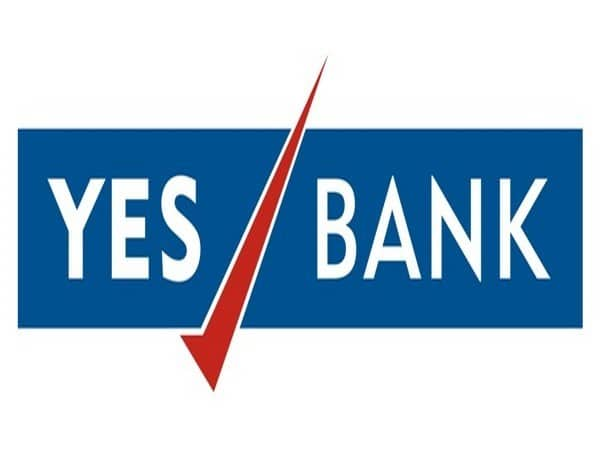

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1**-  $\color{blue}{\text{Manikanta Bommisetti}}$

#**Project Summary-**

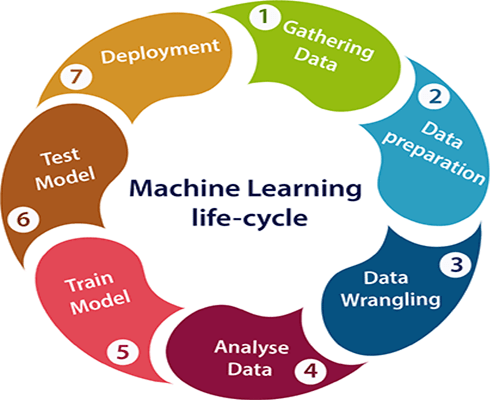

**1. Gathering Data :**


Data Gathering is the first step of the machine learning life cycle. The goal of this step is to identify and obtain all data-related problems.

In this step, we need to identify the different data sources, as data can be collected from various sources such as files, database, internet, or mobile devices

The quantity and quality of the collected data will determine the efficiency of the output.





**2. Data Preparation :**

Data preparation is a step where we put our data into a suitable place and prepare it to use in our machine learning training.

This step can be further divided into two processes:

**a) Data exploration:**

It is used to understand the nature of data that we have to work with. We need to understand the characteristics, format, and quality of data.
A better understanding of data leads to an effective outcome. In this, we find Correlations, general trends, and outliers.

**b) Data pre-processing:**

Now the next step is preprocessing of data for its analysis.

**3. Data Wrangling :**
Data wrangling is the process of cleaning and converting raw data into a useable format.

Missing Values

Duplicate data

Invalid data

Noise

**4. Data Analysis :**

The aim of this step is to build a machine learning model to analyze the data using various analytical techniques and review the outcome. It starts with the determination of the type of the problems, where we select the machine learning techniques such as Classification, Regression, Cluster analysis etc.

**5. Train Model :**

Now the next step is to train the model, in this step we train our model to improve its performance for better outcome of the problem.

We use datasets to train the model using various machine learning algorithms. Training a model is required so that it can understand the various patterns, rules, and, features.



**6. Test Model**

Once our machine learning model has been trained on a given dataset, then we test the model. In this step, we check for the accuracy of our model by providing a test dataset to it.

Testing the model determines the percentage accuracy of the model as per the requirement of project or problem.





# **GitHub Link -**

https://github.com/Manikanta-204/Yes-Bank-Stock-Cose-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediciton.ipynb

#**Problem Statement -**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.




 The objective of this project has been to apply different models to check whether the prices/movement of the stock can be predicted using features and past performance by using Linear Regression 

Looking at the various features of the dataset, we can understand the relationships between them and accordingly pass the required parameters in the model to train it and ultimately predict the closing price.


**Data Overview -**

**Open -** The opening price is the price at which a security first trades upon the opening of an exchange on a trading day i.e. buyers and sellers meet to make deals with the highest bidder, the opening price may not have to be the same as the last day's closing price.

**High -** The high is the highest price at which a stock traded during a period.

**Low -**The low is the highest price at which a stock traded during a period.

**Close -**The closing price is a stock's trading price at the end of a trading day. This makes it the most recent price of a stock until the next trading session. The closing price is calculated as the weighted average price of the last 30 minutes, i.e. from 3:00 PM to 3:30 PM in case of equity.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.linear_model import Lasso,LassoCV
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [4]:
#mounting the data set
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Load Dataset
yes_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CP2-Yes bank stock closing price prediction/data_YesBank_StockPrices.csv')

### Dataset First View

In [6]:
# Dataset First Look
yes_data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
yes_data.shape

(185, 5)

### DataSet Information





Date : unique id of each observation (Date)

Open : Opening price (Numeric)

High : Highest price (Numeric)

Low  : lowest price (Numeric)

Close : Closing price (Numeric) 


In [8]:
# Dataset Info
yes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
len(yes_data[yes_data.duplicated()])

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
yes_data.isna().sum().sort_values(ascending=False)

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

## ***2. Understanding Your Variables***

In [11]:
## Dataset Columns
yes_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [12]:
# Dataset Describe
yes_data.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
variables_df = yes_data.columns.to_list()
variables_df

['Date', 'Open', 'High', 'Low', 'Close']

In [14]:
for i in variables_df:
  print('The Unique Values of', i, 'are:', yes_data[i].unique())

The Unique Values of Date are: ['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' '

In [15]:
numeric_features = list(set(yes_data.describe().columns)-{'Close'})
print(numeric_features)

['High', 'Open', 'Low']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
#Changing date colunn datatype to datetime format.
from datetime import datetime
yes_data['Date'] = yes_data['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [17]:
#Check the datatype of the columns after changing datatype of date
yes_data.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object




There are no duplicates present

There are no null values present

Columns in dataset are Date,Open,High,Low,Close


In [18]:
yes_data['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

In [19]:
from datetime import date
#Extracting year from date column
yes_data['Date']=pd.to_datetime(yes_data['Date'], format='%Y-%m-%d')
yr = pd.DatetimeIndex(yes_data['Date']).year
print(yr)

Int64Index([2005, 2005, 2005, 2005, 2005, 2005, 2006, 2006, 2006, 2006,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='Date', length=185)


In [20]:
#creating dataframe of date & close
date_close_df = pd.DataFrame({"Date":yr,"Close":yes_data['Close']})
date_close_df

,Date,Close
0,2005,12.46
1,2005,13.42
2,2005,13.30
3,2005,12.99
4,2005,13.41
...,...,...
180,2020,11.95
181,2020,14.37
182,2020,13.15
183,2020,12.42


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

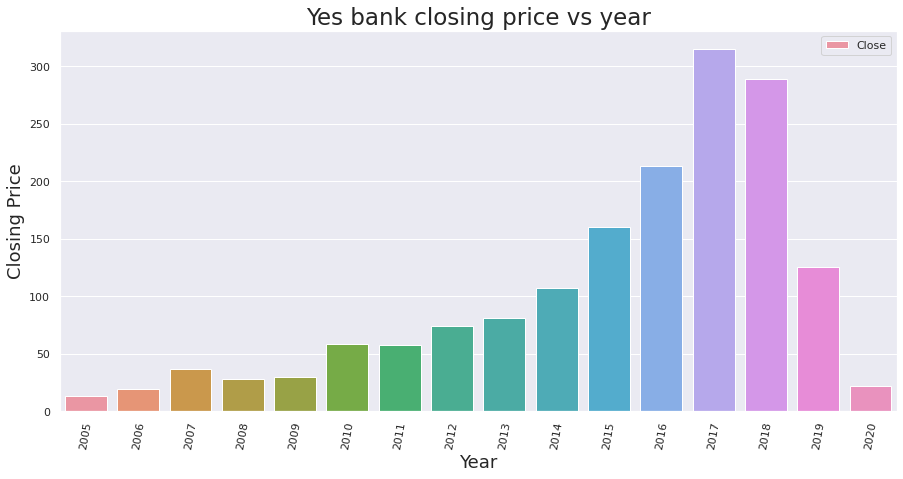

In [93]:
# Chart - 1 visualization code
#Barplot graph visualization
import seaborn as sns
fig = plt.figure(figsize=(15,7))
bar = sns.barplot(x='Date',y='Close',data=date_close_df,ci=None)
plt.title("Yes bank closing price vs year",fontsize=23)
plt.xlabel("Year",fontsize=18)
plt.ylabel("Closing Price",fontsize=18)
plt.xticks(rotation=80)
plt.legend(['Close'])
sns.set_style("darkgrid")
plt.show()

##### 1. Why did you pick the specific chart?

To check the year wise closing price

##### 2. What is/are the insight(s) found from the chart?

We can see year wise closing price range

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes It helps alot in this plot we are able to find sudden increment of close price

#### Chart - 2

(array([731581., 732312., 733042., 733773., 734503., 735234., 735964.,
        736695., 737425., 738156.]),
 <a list of 10 Text major ticklabel objects>)

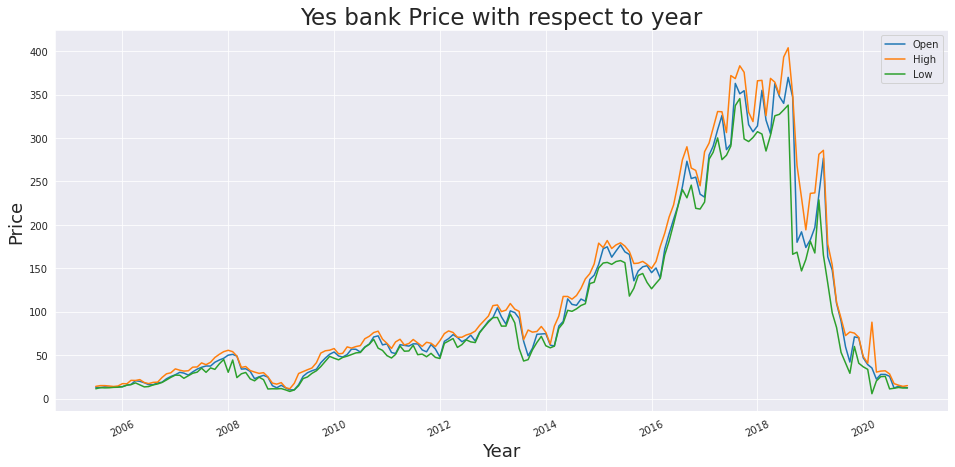

In [22]:
# Chart - 2 visualization code
#Lineplot graph between year & price
fig = plt.figure(figsize=(16,7))
sns.lineplot(x = "Date", y = "Open", data = yes_data)
sns.lineplot(x = "Date", y = "High", data = yes_data)
sns.lineplot(x = "Date", y = "Low", data = yes_data)
plt.title("Yes bank Price with respect to year",fontsize=23)
plt.xlabel("Year",fontsize=18)
plt.ylabel("Price",fontsize=18)
plt.legend(["Open","High","Low"])
plt.xticks(rotation = 25)

##### 1. Why did you pick the specific chart?

To check Open, High and low price range

##### 2. What is/are the insight(s) found from the chart?

We can observe the dependent variables price 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes It helps now we can see the difference of three and sudden increment and decrement 

#### Chart - 3

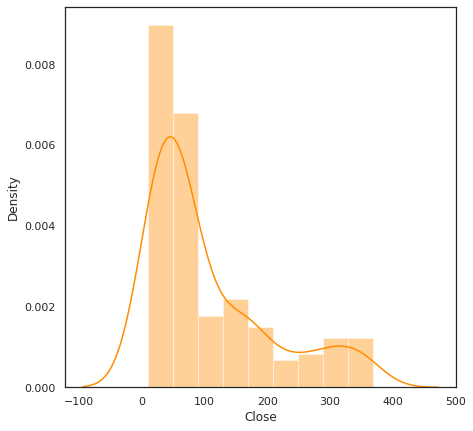

In [95]:
# Chart - 3 visualization code
#Dependent variable price
plt.figure(figsize=(7,7))
sns.distplot(yes_data['Close'],color='darkorange')
sns.set_theme(style="white", palette=None)
plt.grid(False)

##### 1. Why did you pick the specific chart?

To check univariant distribution of close price data

##### 2. What is/are the insight(s) found from the chart?

From above plot we can say that it is rightly skewed distribution

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes  a right-skewed distribution has a long tail In skewed data, the tail region may act as an outlier for the statistical model, 

we know that outliers adversely affect a model’s performance, especially regression-based models

We can conclude that data is not normally distributed as mean is higher than median in all features. By using logarithmic transformation, we have to convert our columns into normal distribution dataset.



#### Chart - 4

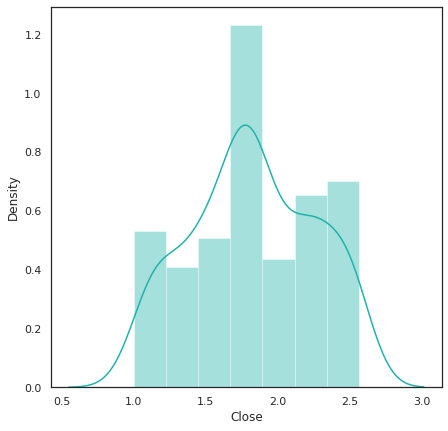

In [24]:
# Chart - 4 visualization code
#Normal distribution
plt.figure(figsize=(7,7))
sns.distplot(np.log10(yes_data['Close']),color='lightseagreen')
sns.set_theme(style="white", palette=None)
plt.grid(False)

##### 1. Why did you pick the specific chart?

To check the uniform distribution of data

##### 2. What is/are the insight(s) found from the chart?

Now there was no skewed data and it is distributed uniformly

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes uniform distribution helps to find out good prediction results

#### Chart - 5

<function matplotlib.pyplot.show(*args, **kw)>

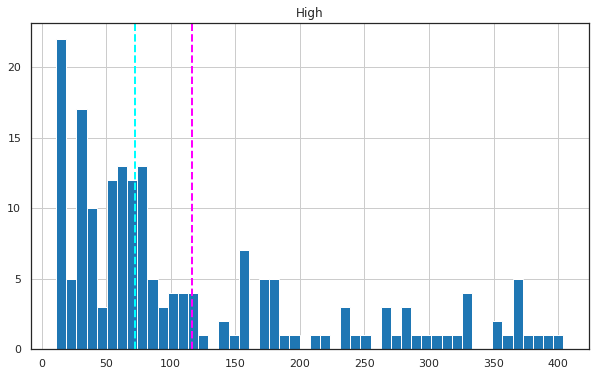

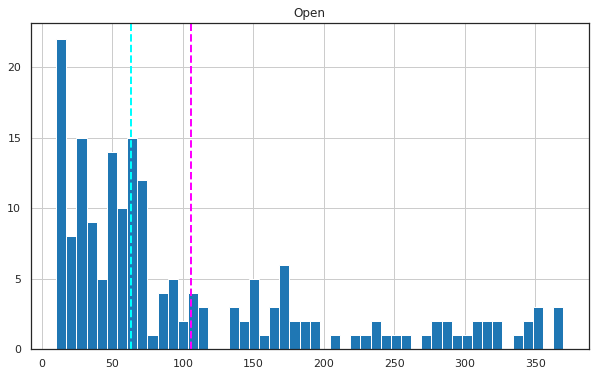

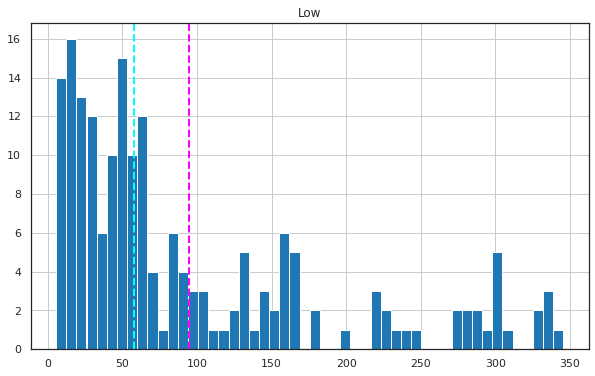

In [25]:
# Chart - 5 visualization code
# plot a bar plot for each numerical feature count (Date)
for col in numeric_features[:]:
  fig = plt.figure(figsize=(10,6))
  ax = fig.gca()
  feature = yes_data[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(),color='magenta',linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='cyan',linestyle='dashed',linewidth=2)
  ax.set_title(col)
plt.show


##### 1. Why did you pick the specific chart?

To check default data mean & median

##### 2. What is/are the insight(s) found from the chart?

We can observe differenec of median and mean

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 6

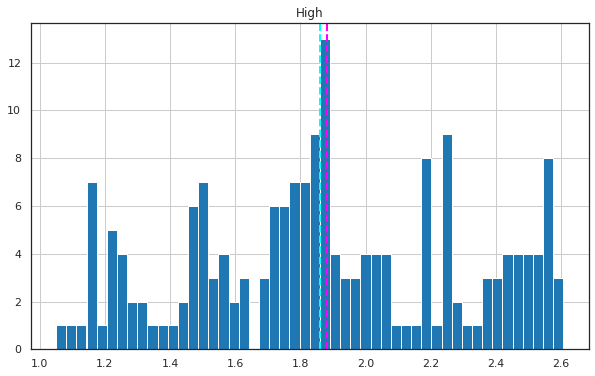

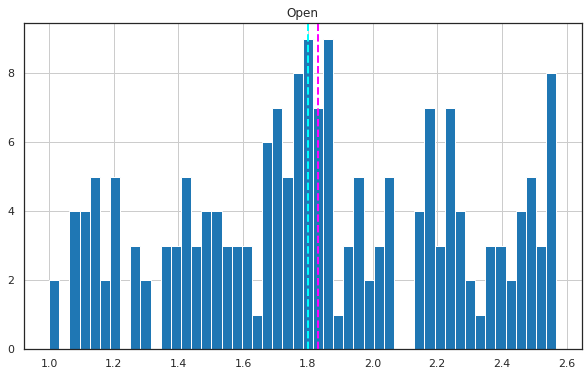

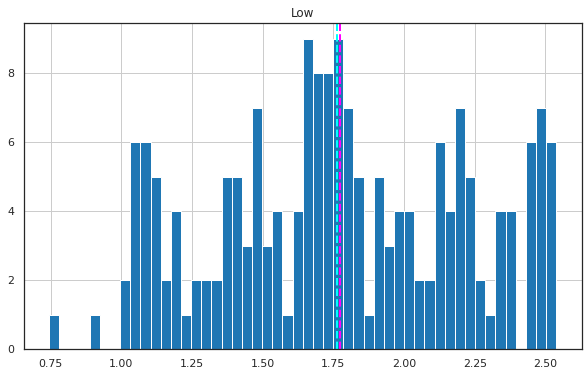

In [26]:
# Chart - 6 visualization code
# Applying log transformation
for col in numeric_features[:]:
  fig = plt.figure(figsize=(10,6))
  ax = fig.gca()
  feature = np.log10(yes_data[col])
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

To check mean and median after apply log trnasfermation

##### 2. What is/are the insight(s) found from the chart?

We can see mean and median are close to each other

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 7

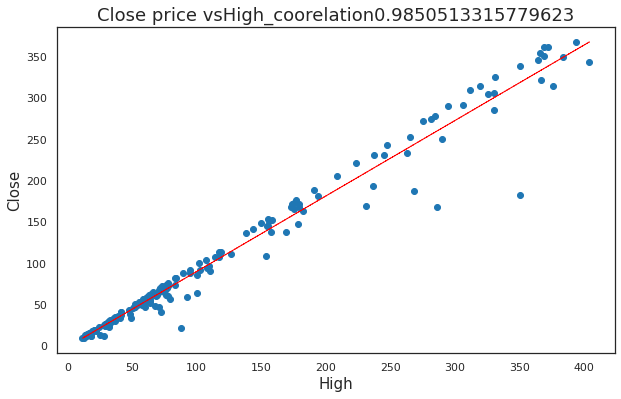

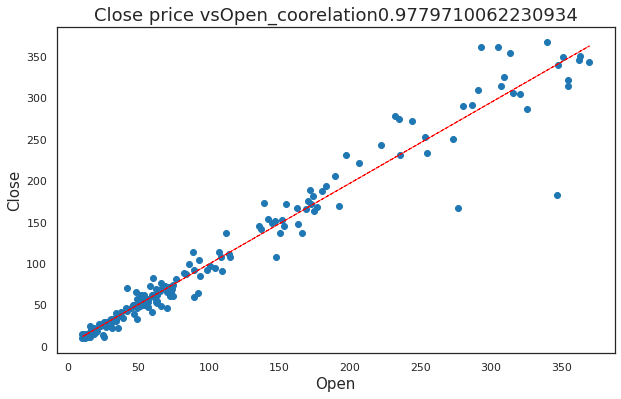

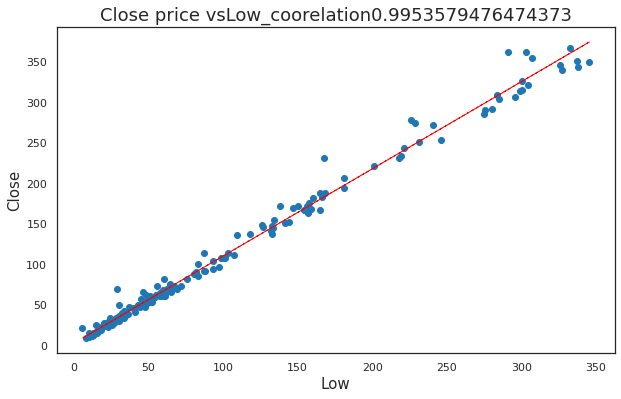

In [27]:
# Chart - 7 visualization code
#Plotting scatter plot for best fit line
for col in numeric_features[:]:
  fig = plt.figure(figsize=(10,6))
  ax = fig.gca()
  feature = yes_data[col]
  label = yes_data['Close']
  correlation = feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col,fontsize=15)
  plt.ylabel('Close',fontsize=15)
  ax.set_title('Close price vs'+ col + '_coorelation'+ str(correlation),fontsize=18)
  z = np.polyfit(yes_data[col],yes_data['Close'],1)
  y_hat = np.poly1d(z)(yes_data[col])

  plt.plot(yes_data[col],y_hat,"r--",lw=1)
plt.show()

##### 1. Why did you pick the specific chart?

To check the how data points are close to the line

##### 2. What is/are the insight(s) found from the chart?

There are few data points are far from line 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 8 Correlation Heatmap

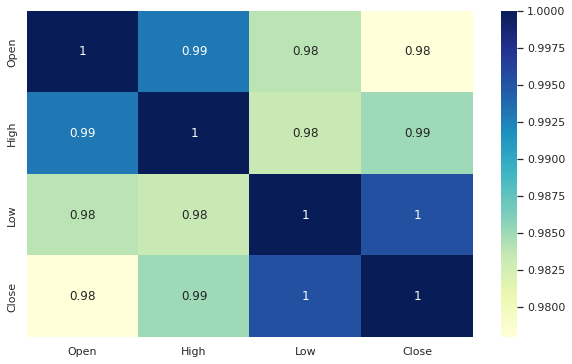

In [28]:
# Chart - 8 visualization code
#Correlation
plt.figure(figsize=(10,6))
correlation = yes_data.corr()
sns.heatmap(abs(correlation),annot=True,cmap='YlGnBu')
plt.show()

##### 1. Why did you pick the specific chart?

To check the correlation between each features in the dataset.

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are very high correlations between independent variables which lead us to multicollinearity. 

High multicollinearity is not good for fitting models and prediction because a slight change in any independent variable will give very unpredictable results.


**Variation Inflation Factor**

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables
 In general case, Any variable having VIF above 5 is considered to be highly multicollinear. 
 
The thumb rule is to drop the highest VIF variable. However, you may choose to select the variable to be dropped based on business logic 
Here all feature are equally important.


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  #Calculating VIF
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

  return vif

In [30]:
calc_vif(yes_data[[i for i in yes_data.describe().columns if i not in['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


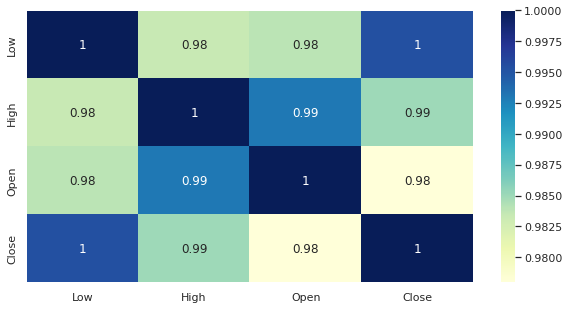

In [31]:
plt.figure(figsize=(10,5))
correlation = yes_data[['Low','High','Open','Close']].corr()
sns.heatmap(abs(correlation),annot=True,cmap='YlGnBu')
plt.show()

## ***5. ML Model Implementation***

### ML Model - 1

**Linear Regression**


X = Independent Variable

y = Dependent Variable 

In [32]:
X = yes_data.drop(columns=['Date','Close'])
y= yes_data['Close']

Normalization is a scaling technique in Machine Learning applied during data preparation to change the values of numeric columns in the dataset to use a common scale. It is not necessary for all datasets in a model. It is required only when features of machine learning models have different ranges.

Normalization techniques 

1.Min-Max Scaling

2.Standardization Scaling

Standardization scaling is also known as Z-score normalization, in which values are centered around the mean with a unit standard deviation, which means the attribute becomes zero and the resultant distribution has a unit standard deviation. Mathematically, we can calculate the standardization by subtracting the feature value from the mean and dividing it by standard deviation.

Here I am using Standardization Scaling because of,

Scale values are not restricted to a specific range

It is comparatively less affected by outliers.




In [33]:
#Normalization
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)


**Splitting the Dataset into the Training set and Test set**

In machine learning data preprocessing, we divide our dataset into a training set and test set. This is one of the crucial steps of data preprocessing as by doing this, we can enhance the performance of our machine learning model.

If we train our model very well and its training accuracy is also very high, but we provide a new dataset to it, then it will decrease the performance. So we always try to make a machine learning model which performs well with the training set and also with the test dataset.

In [34]:
#Splitting data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

x_train: features for the training data

x_test: features for testing data

y_train: Dependent variables for training data

y_test: Independent variable for testing data

In [35]:
#Number of rows & columns of train data
X_train.shape

(148, 3)

In [36]:
y_train.shape

(148,)

In [37]:
#Number of rows & columns of test data
X_test.shape


(37, 3)

In [38]:
y_test.shape

(37,)

In [39]:
#fit data into Linear Regression Model
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [40]:
#train accuracy of linear regression model
reg.score(X_train,y_train)

0.8146653424416905

In [41]:
coefficients = reg.coef_

In [42]:
len(coefficients)

3

In [43]:
reg.intercept_

1.8292785179315048

In [44]:
#prediction of test data.
y_pred = reg.predict(X_test)
print(y_pred)

[1.51738682 1.53211837 1.63519027 1.47539354 2.01471458 2.74366588
 1.62601875 1.51851685 1.52352095 1.62092587 2.07716025 1.61560053
 1.47290774 2.63685207 1.70384859 1.61032504 1.52501328 1.95399032
 1.81967493 1.76423173 1.53162271 1.480381   1.83883617 1.6394682
 2.05986731 1.49003242 1.4767562  1.61402383 1.53535964 1.66894676
 2.4177132  2.75914846 1.68261819 2.34869197 1.78260049 1.62415017
 2.34100799]


In [45]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**MSE :** MSE or Mean Squared Error is one of the most preferred metrics for
regression tasks. It is simply the average of the squared difference
between the target value and the value predicted by the regression
model.

**RMSE :** RMSE is the most widely used metric for regression tasks and is the
square root of the averaged squared difference between the target value
and the value predicted by the model.

**R^2 :** Coefficient of Determination or R2 is another metric used for evaluating
the performance of a regression model.
The metric helps us to compare our current model with a constant
baseline and tells us how much our model is better.
The constant baseline is chosen by taking the mean of the data and
drawing a line at the mean.
R2 is a scale-free score that implies it doesn't matter whether the values
are too large or too small, the R2 will always be less than or equal to 1.

**Adjusted R^2 :** Adjusted R2 is always lower
than R2 as it adjusts for the
increasing predictors and
only shows improvement if
there is a real improvement.

In [46]:
#Checking performance of model
MSE = mean_squared_error(y_test,y_pred)
print("MSE",MSE)

RMSE = np.sqrt(MSE)
print("RMSE",RMSE)

MSE 0.03158251893048738
RMSE 0.17771471219481907


In [47]:
r2 = r2_score(y_test,y_pred)
print("r2",r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

r2 0.8225699915389754
Adjusted R2 :  0.8064399907697913


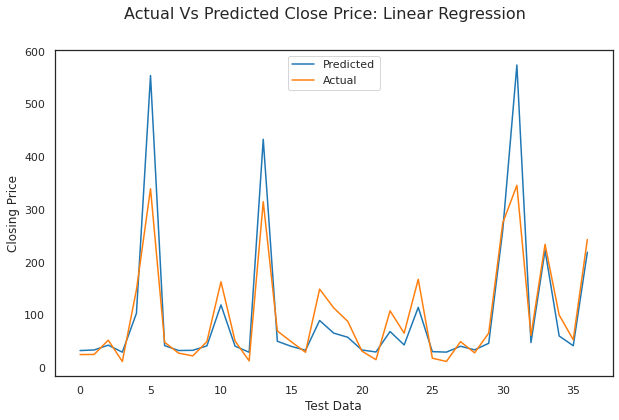

In [48]:
# Actual Price vs. Predicted Price for Linear Regression Plot
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.suptitle('Actual Vs Predicted Close Price: Linear Regression', fontsize=16)
plt.xlabel('Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.legend(["Predicted","Actual"])
plt.show()

### **Lasso Rgression**

Lasso regression is another regularization technique to reduce the complexity of the model. It stands for Least Absolute and Selection Operator, It is also called as L1 regularization..

The penalty term contains only the absolute weights instead of a square of weights.

Since it takes absolute values, hence, it can shrink the slope to 0, whereas Ridge Regression can only shrink it near to 0.

Lasso regression helps to reduce the overfitting in the model as well as feature selection.

In [49]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1,max_iter=3000)
#Fit data into lasso regression model
lasso_reg = lasso.fit(X_train,y_train)

In [50]:
#accuracy of lasso regression model
round(lasso_reg.score(X_train,y_train),4)

0.7596

In [51]:
lasso.coef_

array([0.        , 0.14272347, 0.14118996])

In [52]:
#prediction of test data.
y_pred_lasso = lasso_reg.predict(X_test)
print(y_pred_lasso)

[1.59885328 1.60997773 1.68949351 1.56874001 1.97344962 2.50656093
 1.68566448 1.59981089 1.60579373 1.67686268 2.01562595 1.67079926
 1.56599398 2.42326589 1.73700316 1.66886904 1.60484921 1.92532022
 1.82059101 1.78055609 1.61048878 1.57288435 1.83725499 1.68838669
 1.99972092 1.57880718 1.56982374 1.66984062 1.61279255 1.71366385
 2.26101503 2.52324602 1.72444246 2.22095436 1.79381669 1.67767545
 2.20353159]


In [53]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [54]:
#Checking performance of model
MSE = mean_squared_error(10**(y_test),10**(y_pred_lasso))
print("MSE :",MSE)
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)
r2 = r2_score(10**(y_test),10**(y_pred_lasso))
print("R2 :",r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1334.143060767227
RMSE : 36.525923133676265
R2 : 0.8559139251042968
Adjusted R2 :  0.8428151910228692


**Lasso Regression:Actual vs Prediction**


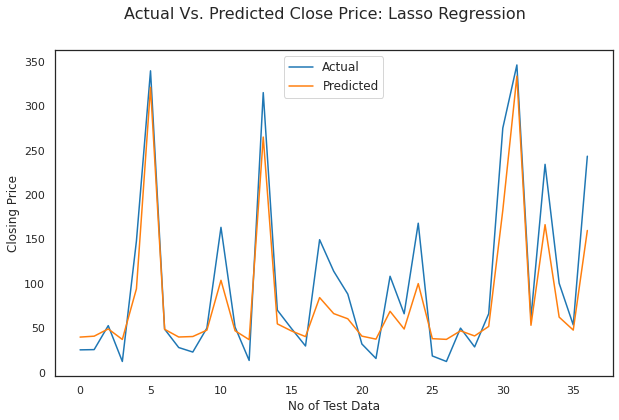

In [55]:
# Actual Price vs. Predicted Price for Lasso Regression Plotting
plt.figure(figsize=(10,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid(False)

#### 2. Cross- Validation & Hyperparameter Tuning

**Cross Validation**


**Train**/**test** **split**: The input data is divided into two parts, that are training set and test set on a ratio of 70:30, 80:20, etc. It provides a high variance, which is one of the biggest disadvantages.

**Training** **Data**: The training data is used to train the model, and the dependent variable is known.

**Test** **Data**: The test data is used to make the predictions from the model that is already trained on the training data. This has the same features as training data but not the part of that.

**Cross**-**Validation** **dataset**: It is used to overcome the disadvantage of train/test split by splitting the dataset into groups of train/test splits, and averaging the result. It can be used if we want to optimize our model that has been trained on the training dataset for the best performance. It is more efficient as compared to train/test split as every observation is used for the training and testing both.

**Cross Validation On Lasso Regression**


In almost any Machine Learning project, we train different models on the dataset and select the one with the best performance. However, there is room for improvement as we cannot say for sure that this particular model is best for the problem at hand. Hence, our aim is to improve the model in any way possible. One important factor in the performances of these models are their hyperparameters, once we set appropriate values for these hyperparameters, the performance of a model can improve significantly

GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model

GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

In [56]:
### Cross Validation
from sklearn.model_selection import GridSearchCV
# Hyper-Parameter Tuning for Lasso Regression
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_reg_cv = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error', cv=5)


In [57]:
#Fit data into lasso model
lasso_reg_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [58]:
print("The best fit alpha value is found out to be :" ,lasso_reg_cv.best_params_)
print("Using ",lasso_reg_cv.best_params_, " the negative mean squared error is: ", lasso_reg_cv.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}
Using  {'alpha': 0.01}  the negative mean squared error is:  -0.03671253815080321


In [59]:
#prediction of test data.
y_pred_lasso_cv = lasso_reg_cv.predict(X_test)
print(y_pred_lasso_cv)

[1.5246758  1.53967822 1.64330447 1.48473667 2.01244712 2.7285637
 1.63520241 1.52506422 1.53318726 1.62734999 2.07429343 1.62111986
 1.48267825 2.61894213 1.7086131  1.61716593 1.53236729 1.9545761
 1.81309013 1.76452438 1.53980312 1.49069997 1.84005176 1.64003515
 2.05511403 1.49942522 1.48609019 1.6186234  1.54359818 1.67617522
 2.39311476 2.74618564 1.68942791 2.34233898 1.78097189 1.62960909
 2.32426455]


In [60]:
np.array(y_test)
     

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [61]:
#Checking performance of model
MSE = mean_squared_error(10**(y_test),10**(y_pred_lasso_cv))
print("MSE :",MSE)
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)
r2 = r2_score(10**(y_test),10**(y_pred_lasso_cv))
print("R2 :",r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 3124.093991414223
RMSE : 55.89359526291204
R2 : 0.6626010702560903
Adjusted R2 :  0.6319284402793712


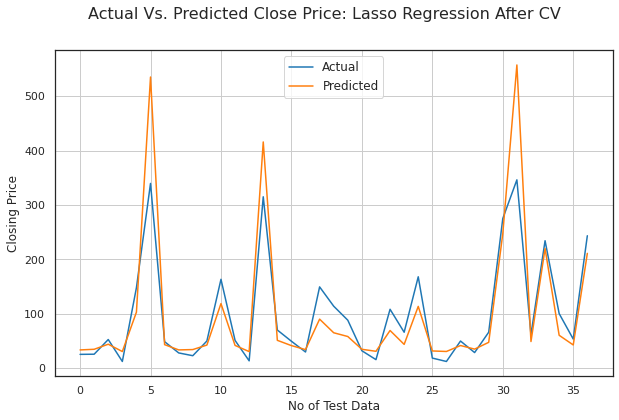

In [62]:
# Actual Price vs Predicted Price for Lasso Regression Plotting after cross validation
plt.figure(figsize=(10,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()
     

**Ridge Regression**

Ridge regression is one of the types of linear regression in which a small amount of bias is introduced so that we can get better long-term predictions.

Ridge regression is a regularization technique, which is used to reduce the complexity of the model. It is also called as L2 regularization.

In this technique, the cost function is altered by adding the penalty term to it. The amount of bias added to the model is called Ridge Regression penalty. We can calculate it by multiplying with the lambda to the squared weight of each individual feature.

Ridge regression is mostly used to reduce the overfitting in the model, and it includes all the features present in the model. It reduces the complexity of the model by shrinking the coefficients.

In [63]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.01)
ridge_reg_model = ridge_reg.fit(X_train,y_train)


In [64]:
round(ridge_reg.score(X_train,y_train),4)

0.8147

In [65]:
#prediction of test data.
y_pred_ridge = ridge_reg.predict(X_test)
print(y_pred_ridge)

[1.51737287 1.53212183 1.63527718 1.47540733 2.01476992 2.74386608
 1.62612711 1.518483   1.52357555 1.62095755 2.07724424 1.61560489
 1.47293231 2.63690439 1.70389154 1.61036116 1.52500609 1.95408562
 1.81948322 1.76419247 1.53164246 1.48042498 1.83887238 1.63935141
 2.05988924 1.49005809 1.47677062 1.61400144 1.53538386 1.66903264
 2.41743053 2.75941508 1.68270132 2.34886131 1.78252064 1.62415831
 2.34089158]


In [66]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [67]:
#Checking performance of model
MSE = mean_squared_error(10**(y_test),10**(y_pred_ridge))
print("MSE :",MSE)
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)
r2 = r2_score(10**(y_test),10**(y_pred_ridge))
print("R2 :",r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 3605.6025601883143
RMSE : 60.04666985094439
R2 : 0.6105986413236122
Adjusted R2 :  0.5751985178075769


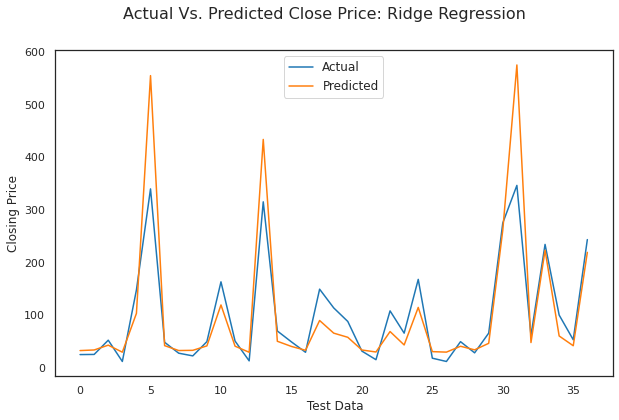

In [68]:
# Actual Price vs. Predicted Price for Ridge Regression Plotting
plt.figure(figsize=(10,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel(' Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid(False)
     

#### 2. Cross- Validation & Hyperparameter Tuning

**Cross Validation On Ridge Regression**

In [69]:
## Cross Validation on  Ridge Regression 
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_reg_cv = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


In [70]:
#Fit the data into ridge model
ridge_reg_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [71]:
print("The best fit alpha value is found out to be :" ,ridge_reg_cv.best_params_)
print("Using ",ridge_reg_cv.best_params_, " the negative mean squared error is: ", ridge_reg_cv.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}
Using  {'alpha': 10}  the negative mean squared error is:  -0.035198971562466846


In [72]:
#prediction of test data.
y_pred_ridge_cv = ridge_reg_cv.predict(X_test)
print(y_pred_ridge_cv)

[1.52133054 1.53728128 1.64940763 1.4839079  2.02368702 2.73378721
 1.64726711 1.5213362  1.53624874 1.6280259  2.07922307 1.61714065
 1.48054103 2.61189076 1.70753952 1.61769429 1.52987123 1.96119864
 1.80123808 1.75900482 1.53947926 1.49160849 1.83960113 1.63228305
 2.05254637 1.49759728 1.48541775 1.61420655 1.54258389 1.68083452
 2.37546978 2.76285145 1.69521298 2.35812164 1.77364892 1.62674463
 2.3102558 ]


In [73]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [74]:
#Checking performance of model
MSE = mean_squared_error(10**(y_test),10**(y_pred_ridge_cv))
print("MSE :",MSE)
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)
r2 = r2_score(10**(y_test),10**(y_pred_ridge_cv))
print("R2 :",r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 3441.952143701007
RMSE : 58.668152721054774
R2 : 0.6282727175603413
Adjusted R2 :  0.594479328247645


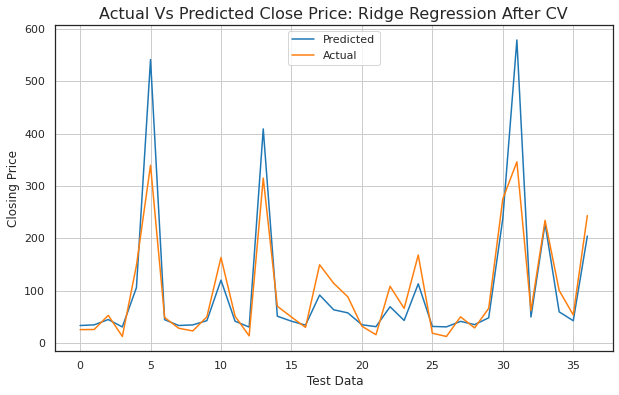

In [75]:
# Actual Price vs. Predicted Price for Ridge Regression Plotting after cv
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_ridge_cv))
plt.plot(10**(np.array(y_test)))
plt.title('Actual Vs Predicted Close Price: Ridge Regression After CV', fontsize=16)
plt.xlabel(' Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.legend(["Predicted","Actual"])
plt.grid()
plt.show()

### **Elastic Net Regression**

Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models.

In [76]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model = elastic_net.fit(X_train,y_train)

In [77]:
#Accuracy of elastic net model
round(elastic_net.score(X_train, y_train),4)

0.7958

In [78]:
#predicting test data
y_pred_en = elastic_net.predict(X_test)
print(y_pred_en)

[1.56086628 1.57468956 1.67199754 1.52786225 1.99947735 2.620323
 1.66975894 1.56099604 1.57327896 1.65381518 2.04818128 1.64463306
 1.52491149 2.51497513 1.72340633 1.64475613 1.56826762 1.94476918
 1.80713181 1.769077   1.57643749 1.53436335 1.83898052 1.65870367
 2.02548893 1.53981805 1.52917355 1.64223008 1.57915854 1.69956403
 2.3103639  2.64491655 1.71211439 2.29131841 1.78218876 1.65297013
 2.25223609]


In [79]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [80]:
#Checking performance of model
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1322.0270143606372
RMSE : 36.3596894150739
R2 : 0.8572224456230602
Adjusted R2 :  0.8442426679524293


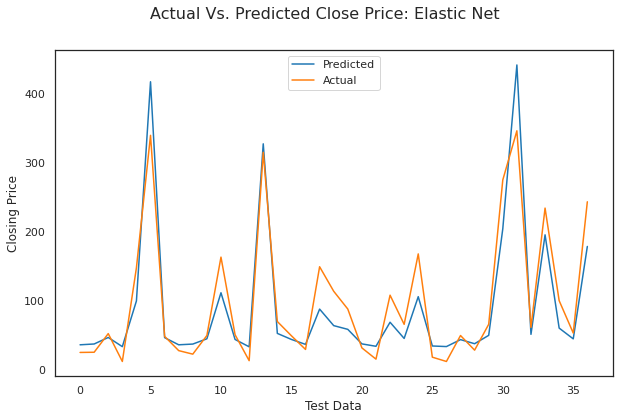

In [81]:
# Actual Price vs. Predicted Price for elastic net Plotting
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_en))
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net', fontsize=16)
plt.xlabel('Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

**Cross Validation On Elastic Net**

In [82]:
#Cross Validation Elastic Net
# Hyper-Parameter Tuning for Elastic Net
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_net_cv = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


In [83]:
#Fit the data into model
elastic_net_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [84]:
print("The best fit alpha value is found out to be :" ,elastic_net_cv.best_params_)
print("Using ",elastic_net_cv.best_params_, " the negative mean squared error is: ", elastic_net_cv.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.8}
Using  {'alpha': 0.01, 'l1_ratio': 0.8}  the negative mean squared error is:  -0.03677704532078478


In [85]:
#Predicting test data
y_pred_elastic_cv = elastic_net_cv.predict(X_test)
print(y_pred_elastic_cv)

[1.52329144 1.53832919 1.64247536 1.48320691 2.01354235 2.73156234
 1.63457883 1.5237498  1.5318878  1.62640078 2.07515458 1.62000715
 1.4810179  2.62147542 1.70784323 1.61614717 1.53103122 1.95499715
 1.81319694 1.76410208 1.53849753 1.48915565 1.83987894 1.63933416
 2.05575648 1.49784504 1.48457187 1.61759682 1.54224891 1.67540253
 2.39565255 2.74959879 1.68878454 2.34450873 1.78069808 1.6285763
 2.32597726]


In [86]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [87]:
#Test performance of elastic model
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic_cv))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic_cv))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 3221.5253660406374
RMSE : 56.75848276725372
R2 : 0.6520785822602829
Adjusted R2 :  0.6204493624657632


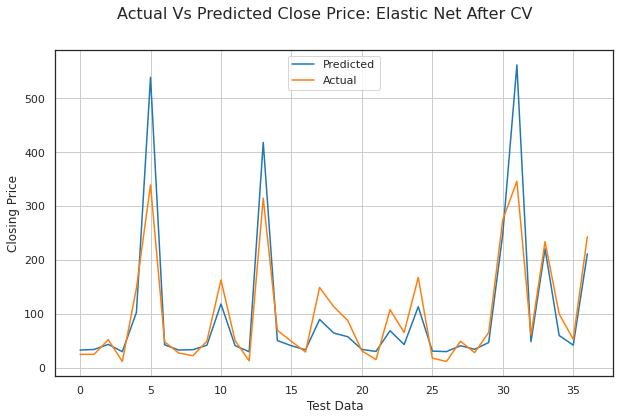

In [88]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting 
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_elastic_cv))
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Close Price: Elastic Net After CV', fontsize=16)
plt.xlabel(' Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.legend(["Predicted","Actual"])
plt.grid()
plt.show()

In [89]:
# Function to run all model 
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns) # Creating dataframe to store the train and test metrics for each of the models
    
    i=0
    
    #Reading model one by one
    for model in models:
        model.fit(X_train,y_train)
        
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        #Computing evaluation metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)
        
       
        MSE=metrics.mean_squared_error(y_test, y_pred_test)
        RMSE=math.sqrt(MSE)
        Rsquare=metrics.r2_score(y_test, y_pred_test)
        
        
        #Inserting in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"MSE"]=round(MSE,3)
        df.loc[i,"RMSE"]=round(RMSE,3)
        df.loc[i,"Rsquare"]=round(Rsquare,3)
        
        i+=1
    
    #Sorting values by accuracy
    df.sort_values(by=['Rsquare'],ascending=False,inplace=True)
    
    return df
     

In [90]:
models = [reg,lasso,ridge,elastic]

In [91]:
#Testing performance
report=score_model(X_train,y_train,X_test,y_test)
report

,Model_Name,MSE,RMSE,Rsquare
0,LinearRegression,0.032,0.178,0.823
2,Ridge,0.032,0.179,0.820
1,Lasso,0.179,0.423,-0.007
3,ElasticNet,0.179,0.423,-0.007


# **Conclusion**

1. There is increase in trend of Yes Bank's stock's Close, Open, 
High, Low price till 2018 an then sudden decrease.

2. We observed that open vs close price graph concluded that 
after 2018 yes bank's stock hitted drastically.

3. We saw Linear relation between the dependent and 
independent value.

4. There was a lot of multicollinearity present in data.

5. The target variable is highly dependent on input variables.